# Setup & Imports

In [1]:
!git clone https://github.com/vasavi672/CAP6415_F25_project-FineTuningRobustCNN.git

Cloning into 'CAP6415_F25_project-FineTuningRobustCNN'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 198 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (198/198), 538.58 KiB | 6.12 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import Image, display

# Base results folder
BASE = Path("/content/CAP6415_F25_project-FineTuningRobustCNN/results")

print("Available result files:")
for p in sorted(BASE.rglob("*")):
    if p.is_file() and p.suffix in [".csv", ".png", ".pth", ".json"]:
        print(p.relative_to(BASE))


Available result files:
ablation/finetuned_model_cf0.25_ff0.7_lr1e-4_e3.pth
ablation/finetuned_model_cf0.5_ff0.5_lr1e-4_e3.pth
ablation/finetuned_model_cf0.5_ff0.7_lr1e-4_e3.pth
ablation/finetuned_model_cf0.5_ff0.9_lr1e-4_e3.pth
ablation/finetuned_model_cf0.75_ff0.7_lr1e-4_e3.pth
ablation/metadata_cf0.25_ff0.7_lr1e-4_e3.json
ablation/metadata_cf0.5_ff0.5_lr1e-4_e3.json
ablation/metadata_cf0.5_ff0.7_lr1e-4_e3.json
ablation/metadata_cf0.5_ff0.9_lr1e-4_e3.json
ablation/metadata_cf0.75_ff0.7_lr1e-4_e3.json
ablation/metrics_cf0.25_ff0.7_lr1e-4_e3.csv
ablation/metrics_cf0.5_ff0.5_lr1e-4_e3.csv
ablation/metrics_cf0.5_ff0.7_lr1e-4_e3.csv
ablation/metrics_cf0.5_ff0.9_lr1e-4_e3.csv
ablation/metrics_cf0.75_ff0.7_lr1e-4_e3.csv
ablation/summary_table.csv
baseline_metrics.csv
baseline_vs_best_cf0.5_ff0.5_lr1e-4_e3.png
baseline_vs_finetuned.png
finetuned_metrics.csv
finetuned_model.pth
inspect_report.json
samples/brightness_s1.png
samples/brightness_s2.png
samples/brightness_s3.png
samples/brightness

# Dataset Samples Preview

Examples of corrupted images (severity 3):


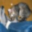

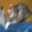

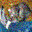

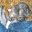

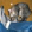

In [4]:
# Show representative corruption samples
sample_dir = BASE / "samples"
sample_imgs = [
    "defocus_blur_s3.png",
    "motion_blur_s3.png",
    "gaussian_noise_s3.png",
    "frost_s3.png",
    "pixelate_s3.png"
]

print("Examples of corrupted images (severity 3):")
for img in sample_imgs:
    display(Image(filename=sample_dir / img, width=150))


# Baseline Model Performance

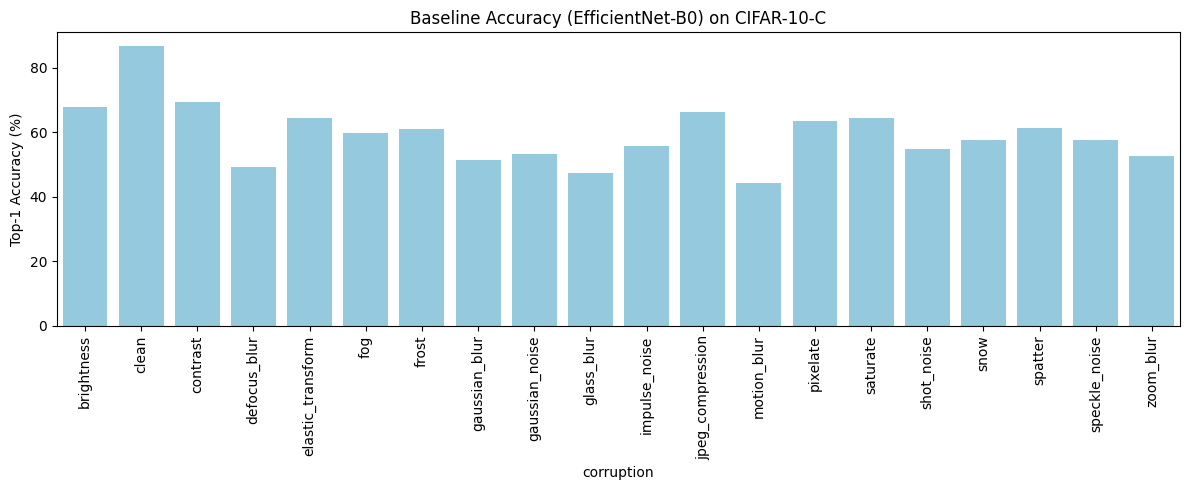

Mean baseline accuracy: 58.28%


In [5]:
baseline_csv = BASE / "baseline_metrics.csv"
baseline = pd.read_csv(baseline_csv)

plt.figure(figsize=(12,5))
sns.barplot(
    data=baseline.groupby("corruption")["top1_accuracy"].mean().reset_index(),
    x="corruption", y="top1_accuracy", color="skyblue"
)
plt.xticks(rotation=90)
plt.title("Baseline Accuracy (EfficientNet-B0) on CIFAR-10-C")
plt.ylabel("Top-1 Accuracy (%)")
plt.tight_layout()
plt.show()

print(f"Mean baseline accuracy: {baseline['top1_accuracy'].mean():.2f}%")


# Fine-Tuned Model Improvements

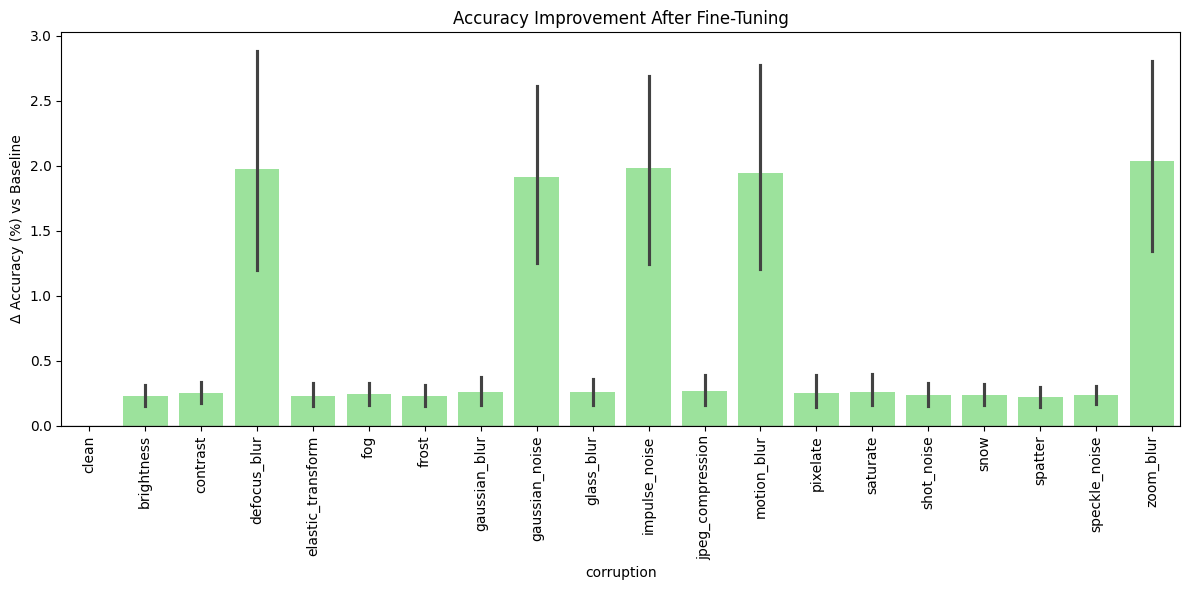

Average gain after fine-tuning: 0.69%


In [6]:
finetuned_csv = BASE / "finetuned_metrics.csv"
finetuned = pd.read_csv(finetuned_csv)

compare = baseline.merge(
    finetuned, on=["corruption", "severity"], suffixes=("_base", "_ft")
)
compare["delta"] = compare["top1_accuracy_ft"] - compare["top1_accuracy_base"]

plt.figure(figsize=(12,6))
sns.barplot(data=compare, x="corruption", y="delta", color="lightgreen")
plt.xticks(rotation=90)
plt.title("Accuracy Improvement After Fine-Tuning")
plt.ylabel("Δ Accuracy (%) vs Baseline")
plt.axhline(0, color="gray", lw=1)
plt.tight_layout()
plt.show()

print(f"Average gain after fine-tuning: {compare['delta'].mean():.2f}%")


# Ablation Study Summary

/tmp/ipython-input-327884014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x="tag", y="mean_top1_all", palette="viridis")


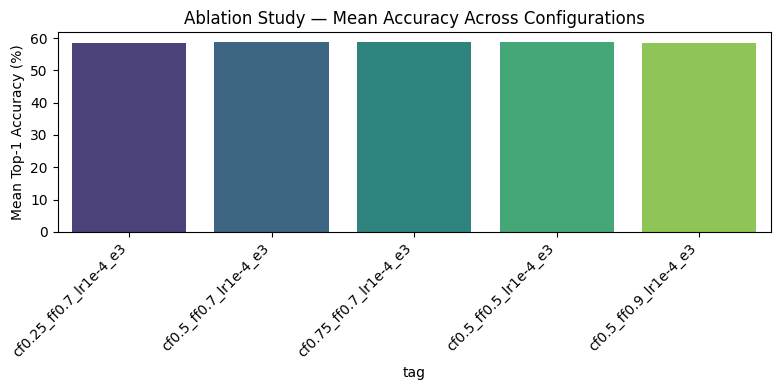

                      tag  mean_top1_all  mean_top1_sev3  \
3   cf0.5_ff0.5_lr1e-4_e3        58.8512         59.7900   
2  cf0.75_ff0.7_lr1e-4_e3        58.8346         59.7478   
1   cf0.5_ff0.7_lr1e-4_e3        58.7252         59.5689   
0  cf0.25_ff0.7_lr1e-4_e3        58.6038         59.3637   
4   cf0.5_ff0.9_lr1e-4_e3        58.5325         59.2210   

                                         metrics_csv  \
3  results/ablation/metrics_cf0.5_ff0.5_lr1e-4_e3...   
2  results/ablation/metrics_cf0.75_ff0.7_lr1e-4_e...   
1  results/ablation/metrics_cf0.5_ff0.7_lr1e-4_e3...   
0  results/ablation/metrics_cf0.25_ff0.7_lr1e-4_e...   
4  results/ablation/metrics_cf0.5_ff0.9_lr1e-4_e3...   

                                                ckpt  \
3  results/ablation/finetuned_model_cf0.5_ff0.5_l...   
2  results/ablation/finetuned_model_cf0.75_ff0.7_...   
1  results/ablation/finetuned_model_cf0.5_ff0.7_l...   
0  results/ablation/finetuned_model_cf0.25_ff0.7_...   
4  results/ablation/fi

In [7]:
ablation_dir = BASE / "ablation"
summary_csv = ablation_dir / "summary_table.csv"
summary = pd.read_csv(summary_csv)

plt.figure(figsize=(8,4))
sns.barplot(data=summary, x="tag", y="mean_top1_all", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Ablation Study — Mean Accuracy Across Configurations")
plt.ylabel("Mean Top-1 Accuracy (%)")
plt.tight_layout()
plt.show()

print(summary.sort_values("mean_top1_all", ascending=False).head())


# Best Model vs Baseline Plot

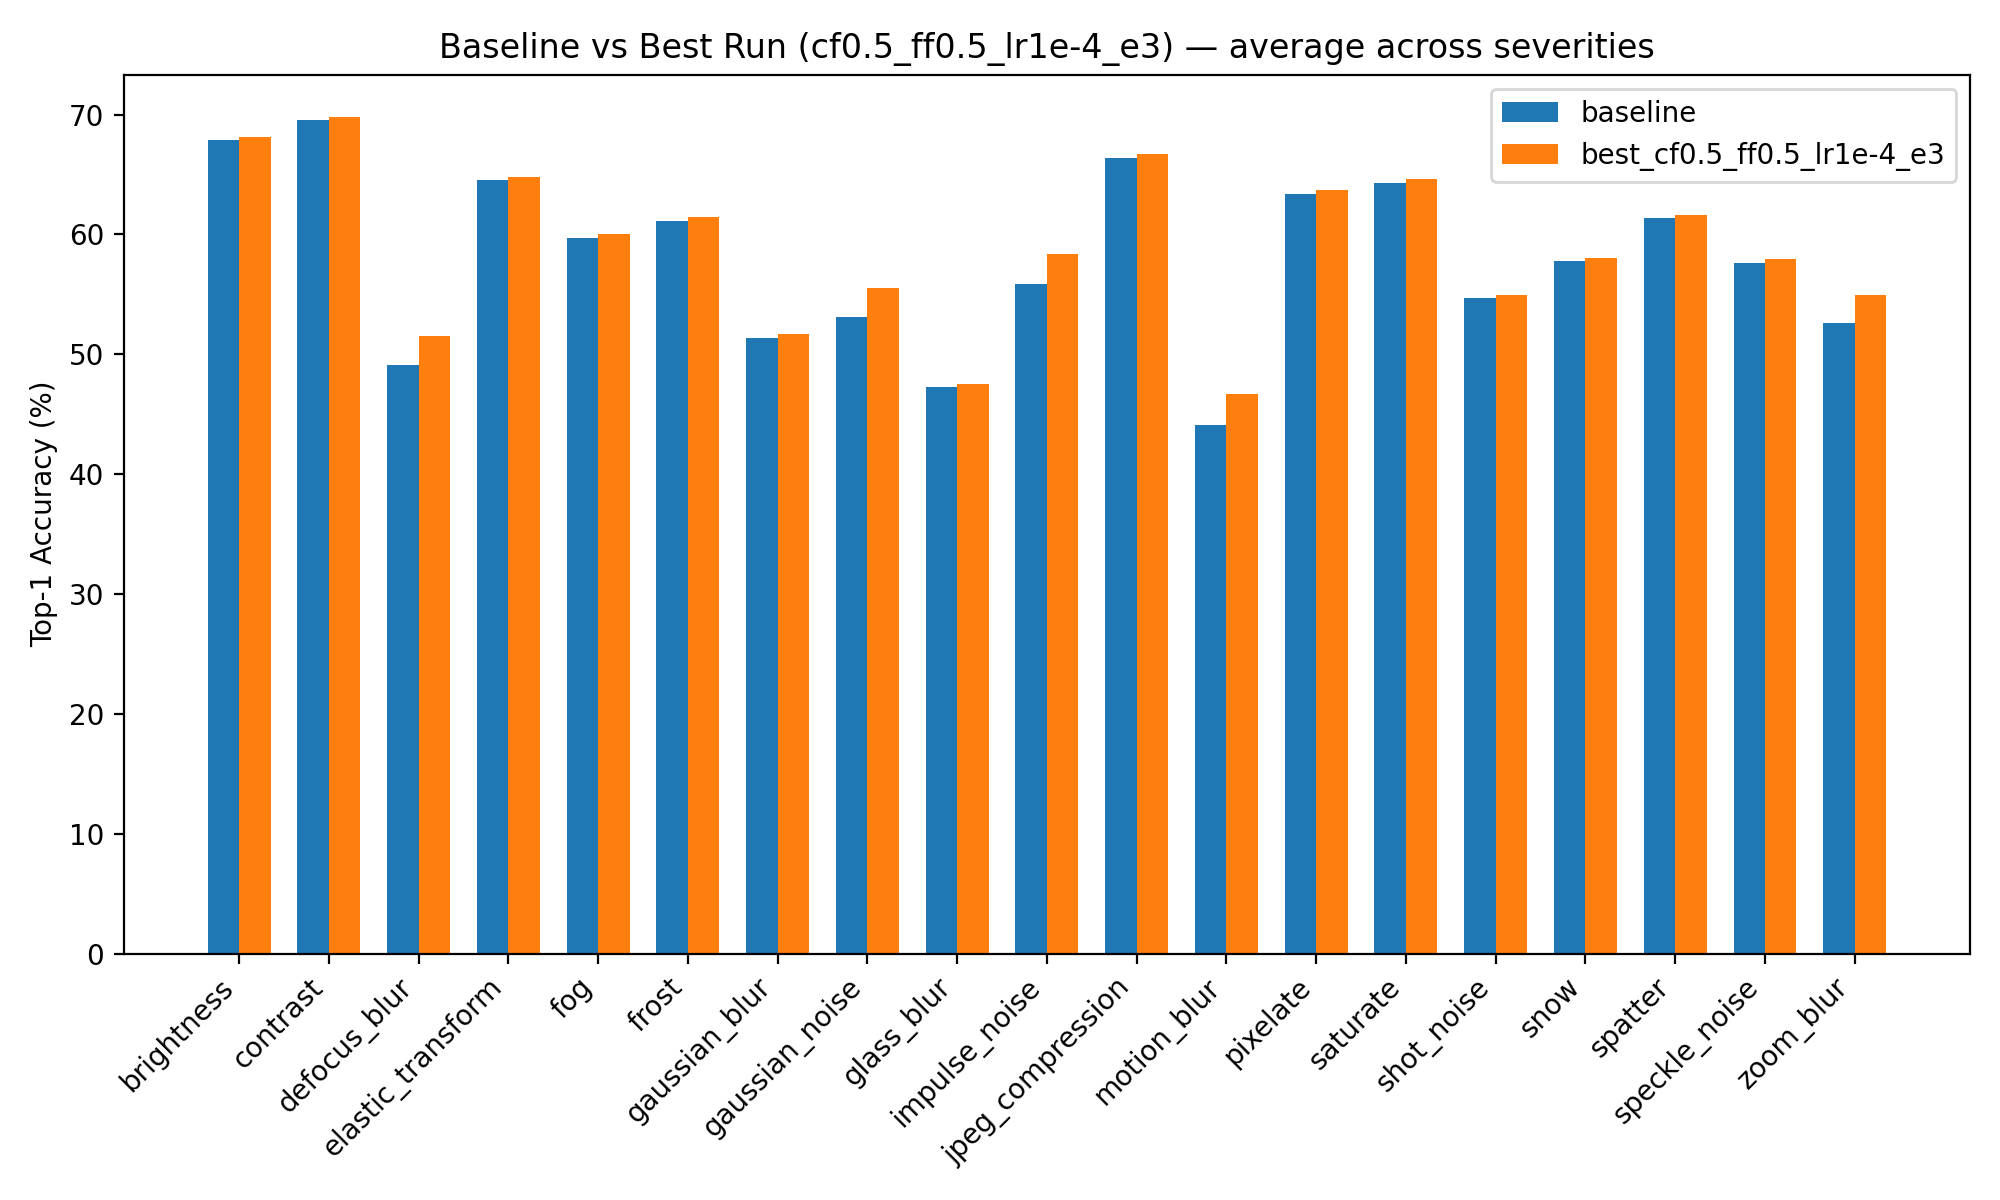

In [10]:
display(Image(filename="/content/CAP6415_F25_project-FineTuningRobustCNN/results/baseline_vs_best_cf0.5_ff0.5_lr1e-4_e3.png", width=800))


# Final Summary Table & Insights

,Stage,Mean Accuracy (%)
0,Baseline,58.276958
1,Fine-Tuned,58.966476
2,Best Ablation,58.851200


/tmp/ipython-input-3871095199.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_summary, x="Stage", y="Mean Accuracy (%)", palette="coolwarm")


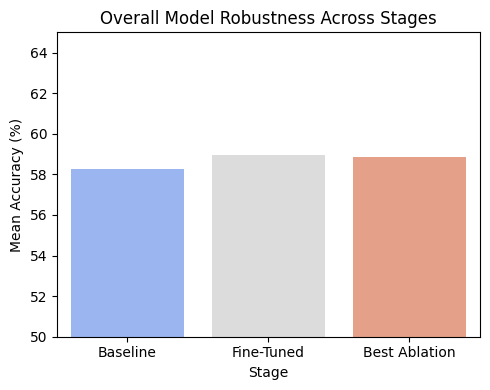

In [11]:
#  Combine baseline, fine-tuned, and best ablation means
final_summary = pd.DataFrame({
    "Stage": ["Baseline", "Fine-Tuned", "Best Ablation"],
    "Mean Accuracy (%)": [
        baseline["top1_accuracy"].mean(),
        finetuned["top1_accuracy"].mean(),
        summary["mean_top1_all"].max()
    ]
})

display(final_summary)

plt.figure(figsize=(5,4))
sns.barplot(data=final_summary, x="Stage", y="Mean Accuracy (%)", palette="coolwarm")
plt.title("Overall Model Robustness Across Stages")
plt.ylim(50, 65)
plt.tight_layout()
plt.show()
